In [1]:
import pandas as pd

d = pd.read_csv("serial.txt", names=['millis', "dt", "v", "a", "w","v_sh"])
d

,millis,dt,v,a,w,v_sh
0,194,1970-01-01 00:00:00,5.080,0.028,0.142,0.003
1,200,1970-01-01 00:00:00,5.080,0.028,0.142,0.003
2,207,1970-01-01 00:00:00,5.088,0.081,0.413,0.008
3,213,1970-01-01 00:00:00,5.088,0.028,0.140,0.003
4,223,1970-01-01 00:00:00,5.088,0.028,0.140,0.003
...,...,...,...,...,...,...
31123,334002,2025-01-19 18:56:18,5.072,0.082,0.418,0.008
31124,334013,2025-01-19 18:56:18,5.072,0.083,0.422,0.008
31125,334023,2025-01-19 18:56:18,5.072,0.083,0.422,0.00.Connected.
31126,Connected.,NaN,NaN,NaN,NaN,NaN


<Axes: >

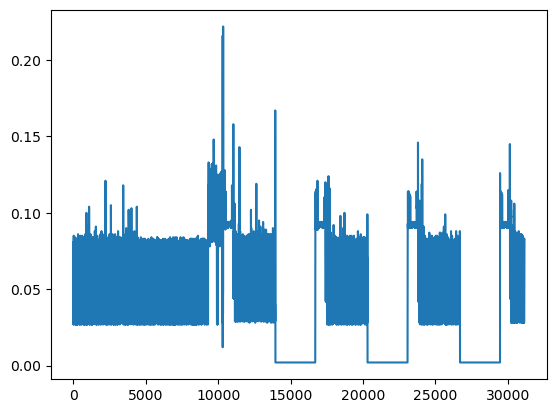

In [2]:
d.a.plot()

<Axes: >

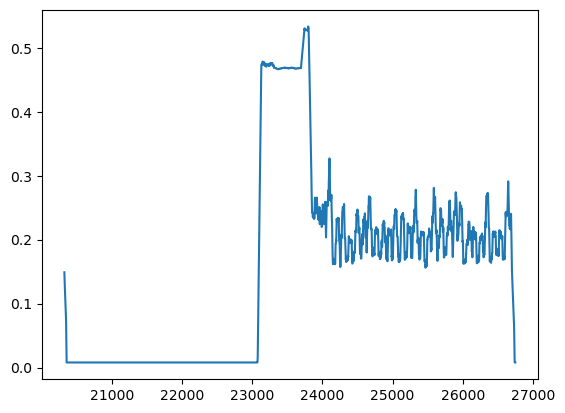

In [3]:
space = slice(20275, 26750) #a ojo de buen cubero
avg = d.w[space].rolling(window=50).mean()
avg.plot()

In [4]:
d[space]

,millis,dt,v,a,w,v_sh
20275,217469,2025-01-19 18:54:22,5.088,0.029,0.147,0.003
20276,217480,2025-01-19 18:54:22,5.088,0.054,0.277,0.005
20277,217491,2025-01-19 18:54:22,5.072,0.054,0.276,0.005
20278,217501,2025-01-19 18:54:22,5.072,0.029,0.148,0.003
20279,217511,2025-01-19 18:54:22,5.072,0.029,0.148,0.003
...,...,...,...,...,...,...
26745,286950,2025-01-19 18:55:31,5.096,0.002,0.008,0.000
26746,286961,2025-01-19 18:55:31,5.096,0.002,0.008,0.000
26747,286971,2025-01-19 18:55:31,5.096,0.002,0.008,0.000
26748,286981,2025-01-19 18:55:31,5.096,0.002,0.008,0.000


In [5]:
offset = pd.to_numeric(d[space].millis.iloc[0])
offset

217469

In [6]:
from scipy import integrate

integrate.trapz(d[space].w, (pd.to_numeric(d[space].millis) - offset) / 1000.0)

10.540569500000013

In [7]:
(pd.to_numeric(d[space].millis) - offset)/1000

20275     0.000
20276     0.011
20277     0.022
20278     0.032
20279     0.042
          ...  
26745    69.481
26746    69.492
26747    69.502
26748    69.512
26749    69.523
Name: millis, Length: 6475, dtype: float64

In [34]:
len(d)

31128

In [31]:
d["millis_n"] = pd.to_numeric(d.millis, errors="coerce")

In [37]:
d = d.dropna()

In [48]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)         # initiate notebook for offline plot


iplot([Scatter(x=d.millis_n, y=d.w)])

In [15]:
d[:-2].millis

0           194
1           200
2           207
3           213
4           223
          ...  
31121    333982
31122    333992
31123    334002
31124    334013
31125    334023
Name: millis, Length: 31126, dtype: object